In [1]:
import random 

def random_kid():
    return random.choice(['boy','girl'])

In [3]:
both_girls = 0
first_girl = 0
either_girl = 0

random.seed(42)

for _ in range(10000):
    first = random_kid()
    second = random_kid()
    if first == 'girl':
        first_girl += 1
    if first == 'girl' and second == 'girl':
        both_girls += 1
    if first == 'girl' or second == 'girl':
        either_girl += 1
        
print('P(both | first_girl)', both_girls / first_girl)
print('P(both | either_girl)', both_girls / either_girl)


P(both | first_girl) 0.5033434650455927
P(both | either_girl) 0.33319919517102614


In [44]:
# %load statistics.py
def vector_add(v,w):
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v,w):
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    if x < 0: return 0
    elif x < 1 : return x
    else: return 1

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (1 / sqrt_two_pi * sigma) * ( math.exp( -(x-mu)**2/2*sigma**2 ) )

def normal_cdf(x, mu=0, sigma=1):
    return ( 1+ math.erf((x-mu) / math.sqrt(2) / sigma)) / 2

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [45]:
xs = [x / 10.0 for x in range(-50,50) ]

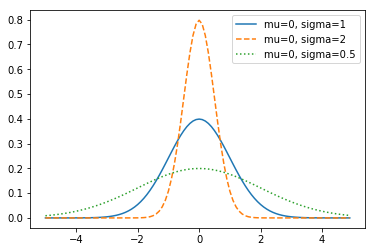

In [46]:
import matplotlib.pyplot as plt
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs],'-',label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs],'--',label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs],':',label='mu=0, sigma=0.5')
plt.legend()

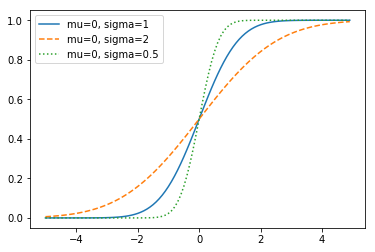

In [47]:
import matplotlib.pyplot as plt
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs],'-',label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs],'--',label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs],':',label='mu=0, sigma=0.5')
plt.legend()

In [56]:
from collections import Counter
def make_hist(p, n, num_points):
    data = [ binomial(n,p) for _ in range(num_points)]
    hitogram = Counter(data)
    plt.bar([x - 0.4 for x in hitogram.keys()],
           [v / num_points for v in hitogram.values()],
           0.8,
           color='0.75')

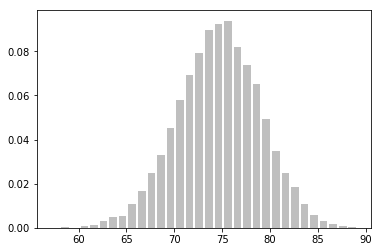

In [57]:
make_hist(0.75, 100, 10000)